In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#import pyActigraphy

# Upload del database

I dati corrispondenti ai primi due giorni li ho skippati in quanto non è stato usato il bracciale

In [16]:
df = pd.read_csv("C:/Users/peppe/Desktop/raw_data/1_week_RAW.csv", skiprows=range(1,13824001))

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [17]:
df

,datetime,x_D,y_D,z_D,x_ND,y_ND,z_ND
0,2017-05-06 00:00:00.000000,-0.242,0.047,0.961,-0.379,0.012,0.910
1,2017-05-06 00:00:00.012500,-0.246,0.043,0.961,-0.383,0.008,0.910
2,2017-05-06 00:00:00.025000,-0.238,0.039,0.961,-0.383,0.004,0.914
3,2017-05-06 00:00:00.037500,-0.238,0.035,0.965,-0.383,0.008,0.914
4,2017-05-06 00:00:00.050000,-0.238,0.035,0.961,-0.383,0.004,0.914
...,...,...,...,...,...,...,...
27647995,2017-05-09 23:59:59.937500,-0.730,0.086,-0.691,0.906,-0.242,0.344
27647996,2017-05-09 23:59:59.950000,-0.727,0.082,-0.695,0.910,-0.242,0.348
27647997,2017-05-09 23:59:59.962500,-0.730,0.078,-0.691,0.902,-0.242,0.340
27647998,2017-05-09 23:59:59.975000,-0.727,0.074,-0.691,0.906,-0.246,0.344


In [ ]:
magnitude_D = np.sqrt(np.square(df['x_D']) + np.square(df['y_D']) + np.square(df['z_D'])) #mano dominante
magnitude_ND = np.sqrt(np.square(df['x_ND']) + np.square(df['y_ND']) + np.square(df['z_ND'])) #mano non dominante

# Asimmetric index

In [ ]:
asimmetric_index = (magnitude_D-magnitude_ND)/(magnitude_D+magnitude_ND)*100

In [ ]:
mean_AI_hourly = []
mean_AI_daily = []
# Iterazione attraverso i dati
for i in range(0, 192):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(asimmetric_index[288000*i+1 : 288000*i+2])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_AI_hourly.append(media_intervallo)

for i in range(0, 4):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(asimmetric_index[6912000*i+1 : 6912000*i+2])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_AI_daily.append(media_intervallo)


Valori medi orari e giornalieri, rispettivamente

In [ ]:
df_AImh=pd.DataFrame(mean_AI_hourly)
df_AImd=pd.DataFrame(mean_AI_daily)

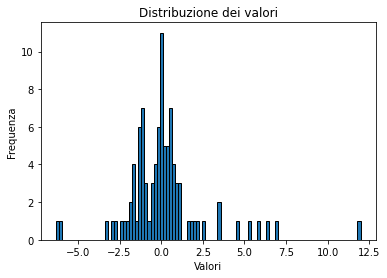

In [ ]:
plt.hist(df_AImh, bins=100, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

In [ ]:
df_AImh.describe()

,0
count,96.000000
mean,0.113366
std,2.361816
min,-6.309917
25%,-1.074757
50%,-0.073389
75%,0.627415
max,11.979824


In [ ]:
df_AImd.describe()

,0
count,4.000000
mean,-0.261619
std,0.902359
min,-1.560954
25%,-0.523792
50%,0.051640
75%,0.313813
max,0.411201


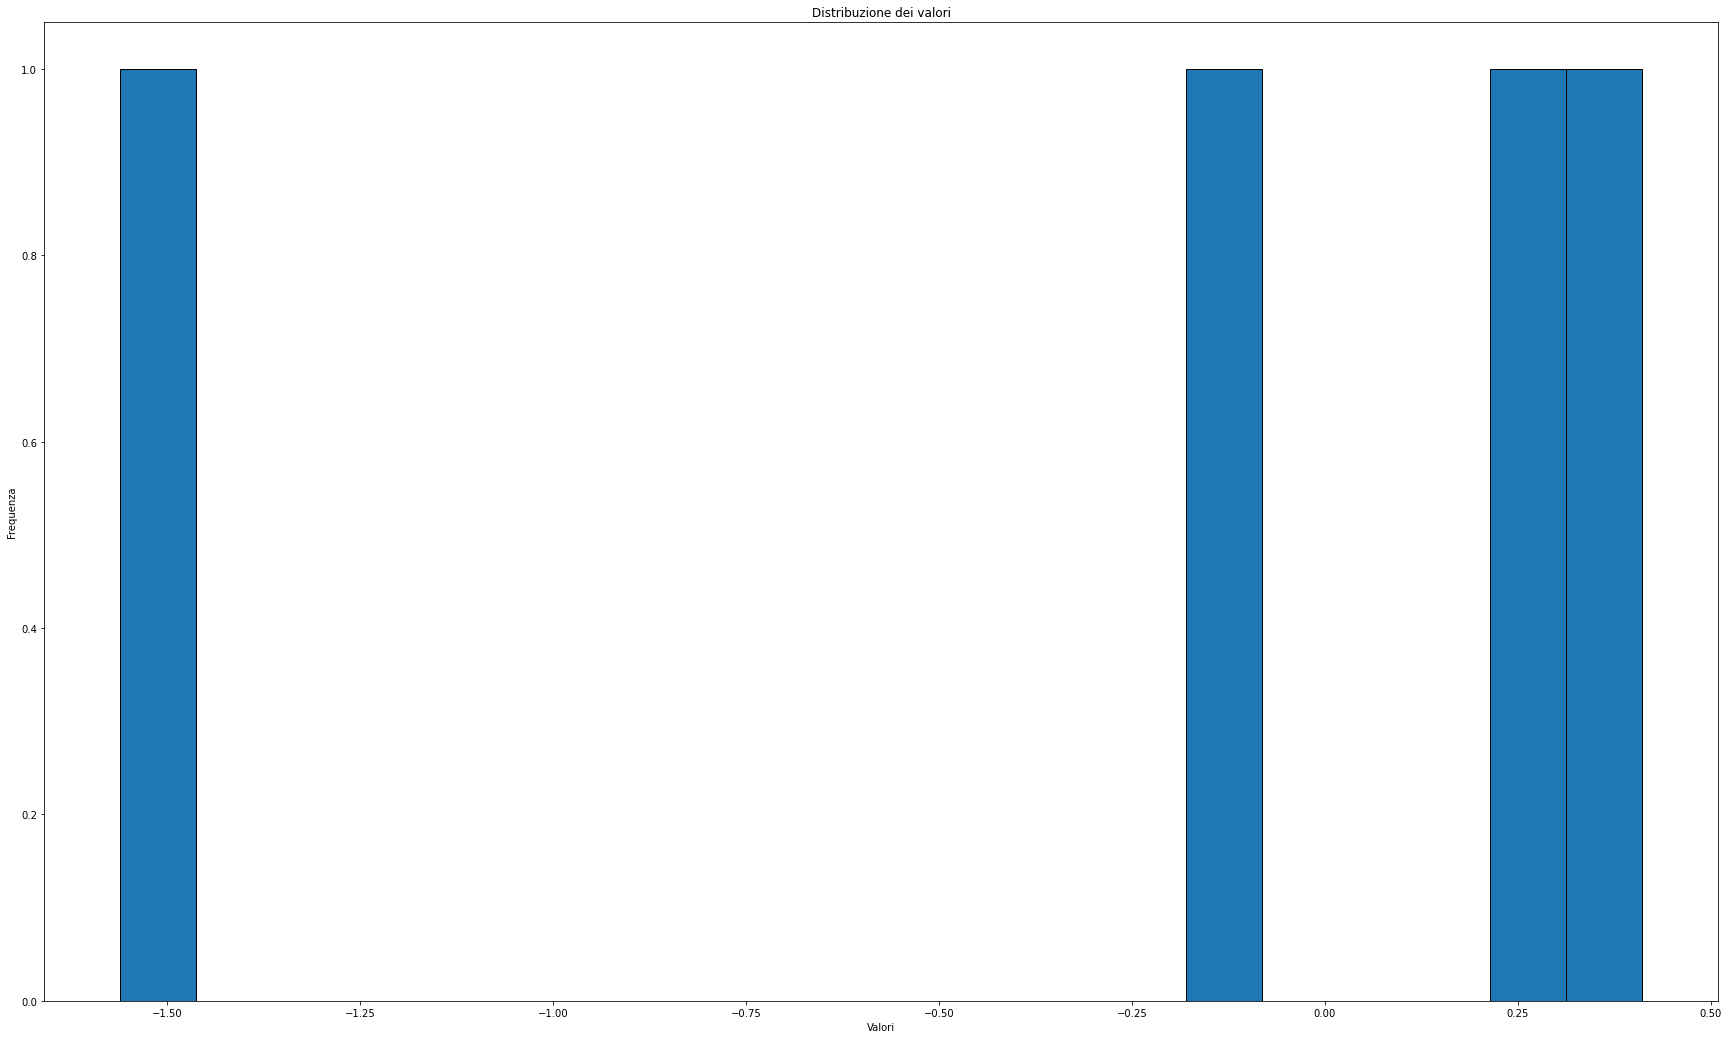

In [20]:
plt.figure(figsize=(30,18))
plt.hist(df_AImd, bins=20, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

Campioni singoli

In [21]:
AIdf = pd.DataFrame(asimmetric_index)

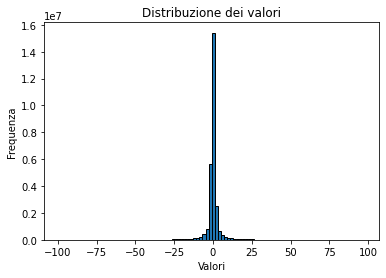

In [22]:
plt.hist(AIdf, bins=100, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

In [23]:
AIdf.describe()

,0
count,2.764800e+07
mean,-1.043154e-01
std,5.363764e+00
min,-9.899052e+01
25%,-1.023401e+00
50%,-5.055453e-02
75%,5.707355e-01
max,9.716654e+01


# Difference index

Rispettivamente elementi singoli, orari e giornalieri

In [32]:
difference_index = (magnitude_D-magnitude_ND)

In [33]:
DIdf = pd.DataFrame(difference_index)

In [34]:
DIdf.describe()

,0
count,2.764800e+07
mean,5.395152e-04
std,1.433053e-01
min,-7.746080e+00
25%,-2.057896e-02
50%,-1.007435e-03
75%,1.147788e-02
max,9.838912e+00


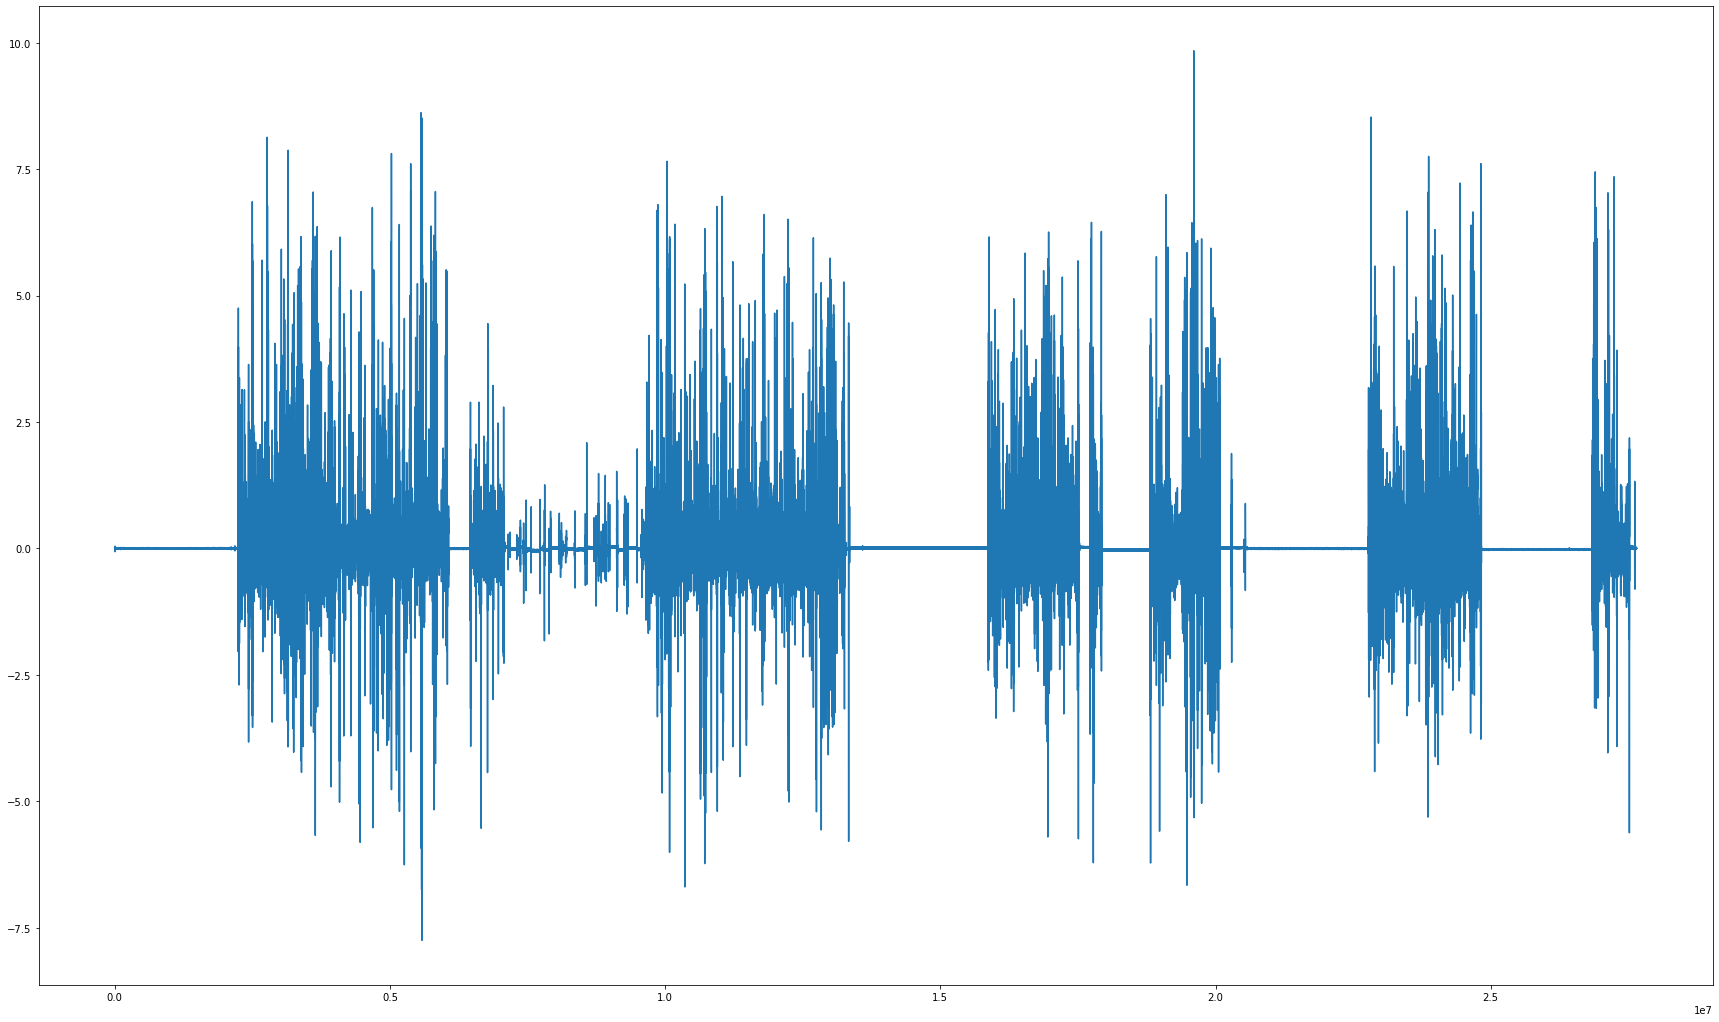

In [27]:
plt.figure(figsize=(30,18))
plt.plot(DIdf)
plt.show()

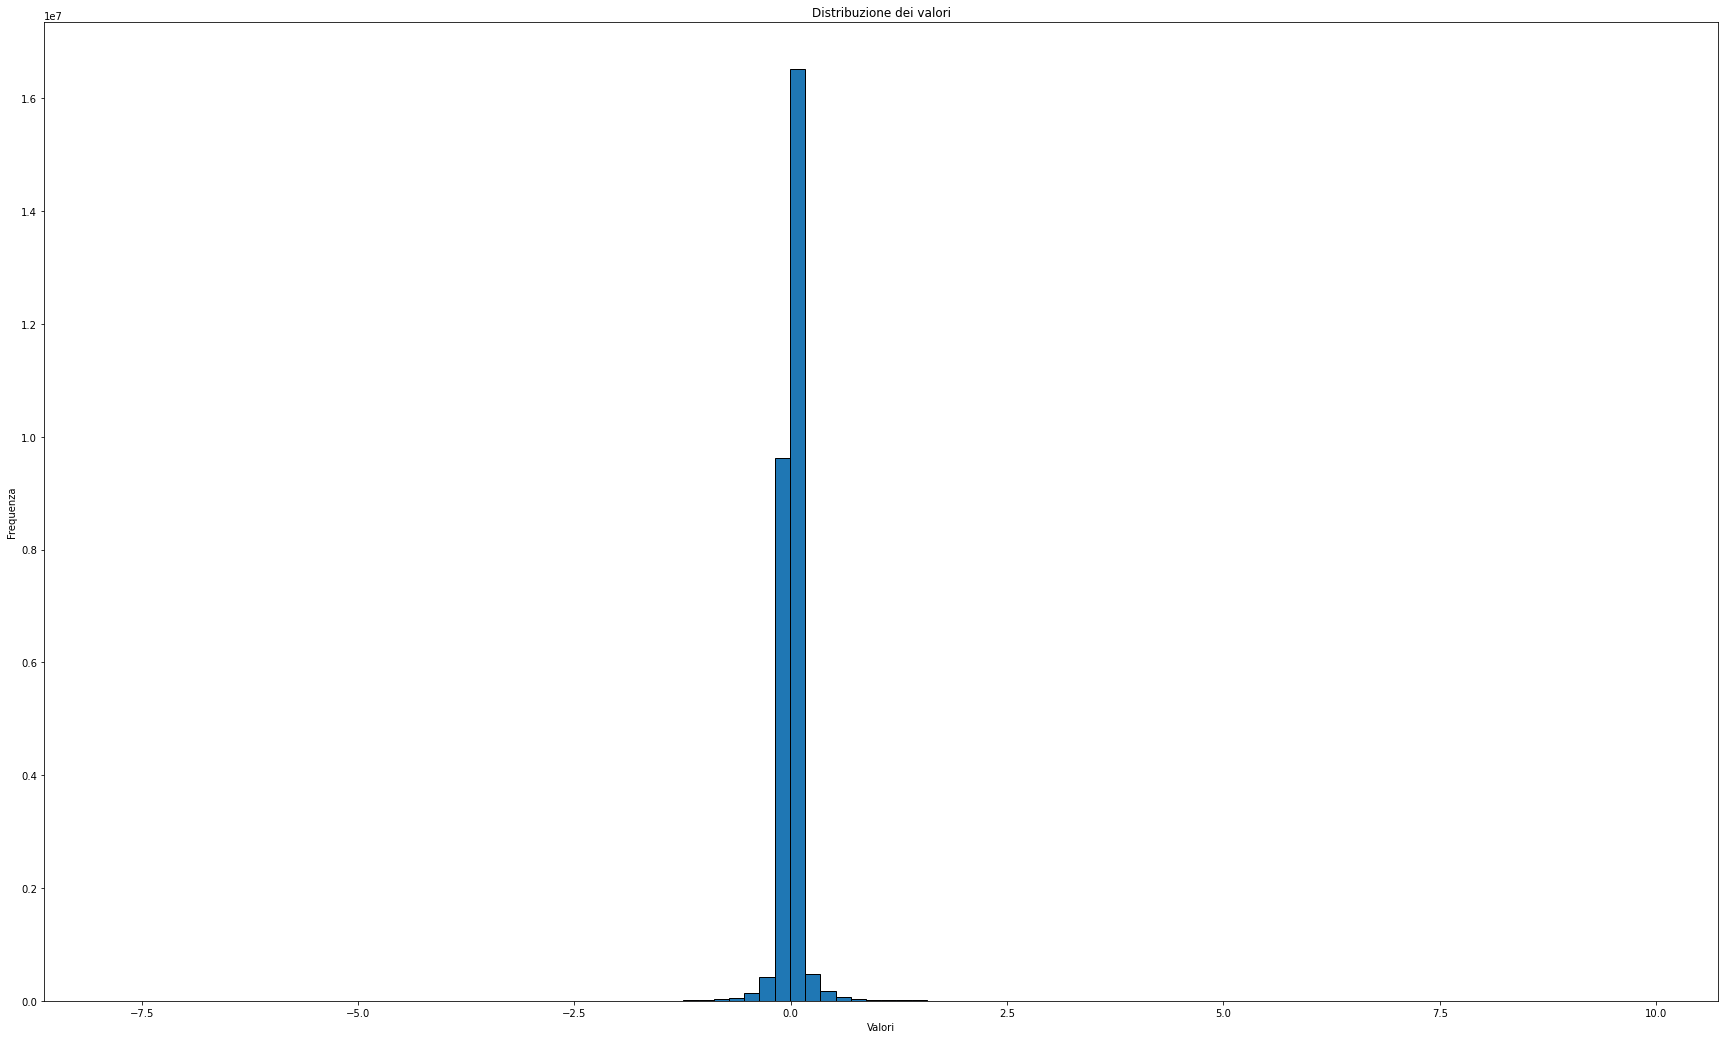

In [38]:
plt.figure(figsize=(30,18))
plt.hist(DIdf, bins=100, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

In [37]:
mean_DI_hourly = []
mean_DI_daily = []
# Iterazione attraverso i dati
for i in range(0, 192):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(difference_index[288000*i+1 : 288000*i+2])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_DI_hourly.append(media_intervallo)

for i in range(0, 4):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(difference_index[6912000*i+1 : 6912000*i+2])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_DI_daily.append(media_intervallo)

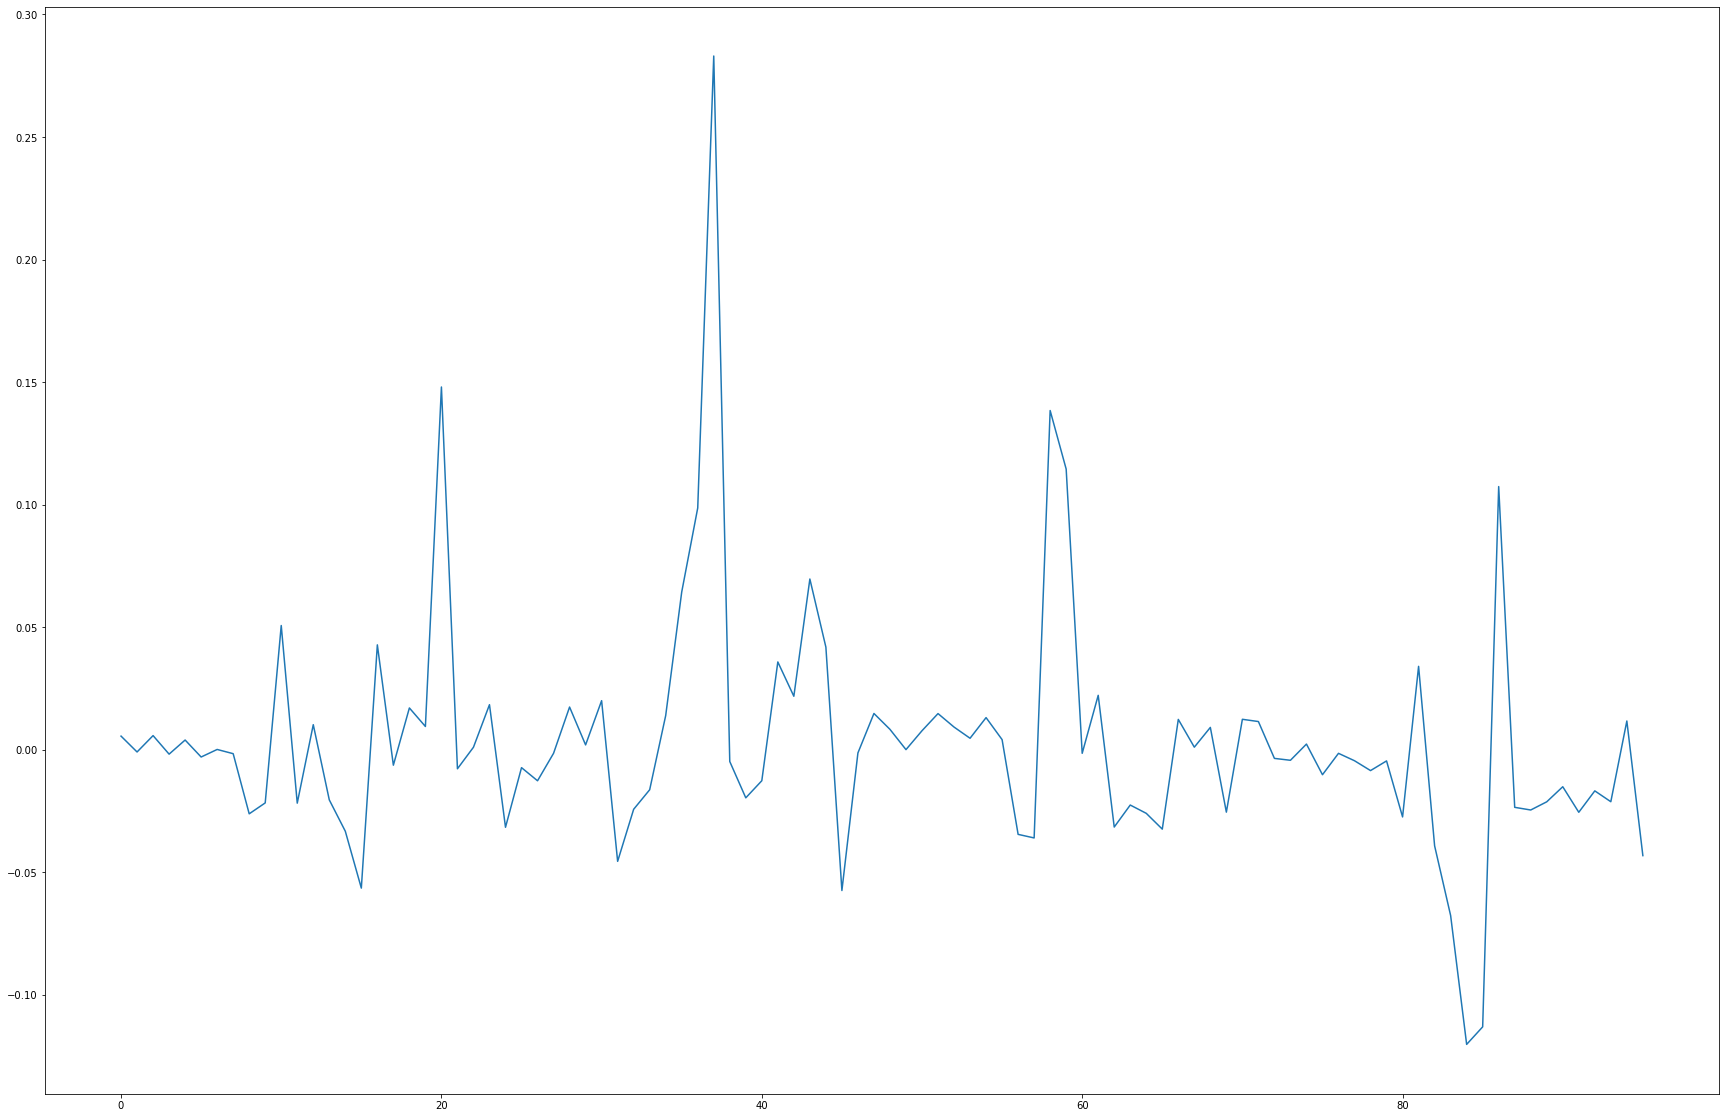

In [38]:
plt.figure(figsize=(30,20))
plt.plot(mean_DI_hourly)

plt.show()

In [48]:
df_DImh=pd.DataFrame(mean_DI_hourly)
df_DImd=pd.DataFrame(mean_DI_daily)

In [41]:
df_DImh.describe()

,0
count,96.000000
mean,0.003069
std,0.049920
min,-0.120189
25%,-0.021704
50%,-0.001449
75%,0.012396
max,0.283014


In [49]:
df_DImd.describe()

,0
count,4.000000
mean,-0.005311
std,0.018259
min,-0.031627
25%,-0.010547
50%,0.001026
75%,0.006261
max,0.008330


# Indice non utilizzato: BAUI

Proposto da Francesca, da implementare in un successivo momento in caso

In [52]:
BAUI=magnitude_ND/magnitude_D

In [53]:
BAUIdf = pd.DataFrame(BAUI)

In [54]:
BAUIdf.describe()

,0
count,2.764800e+07
mean,1.008902e+00
std,1.607620e-01
min,1.437089e-02
25%,9.886501e-01
50%,1.001012e+00
75%,1.020680e+00
max,1.971222e+02


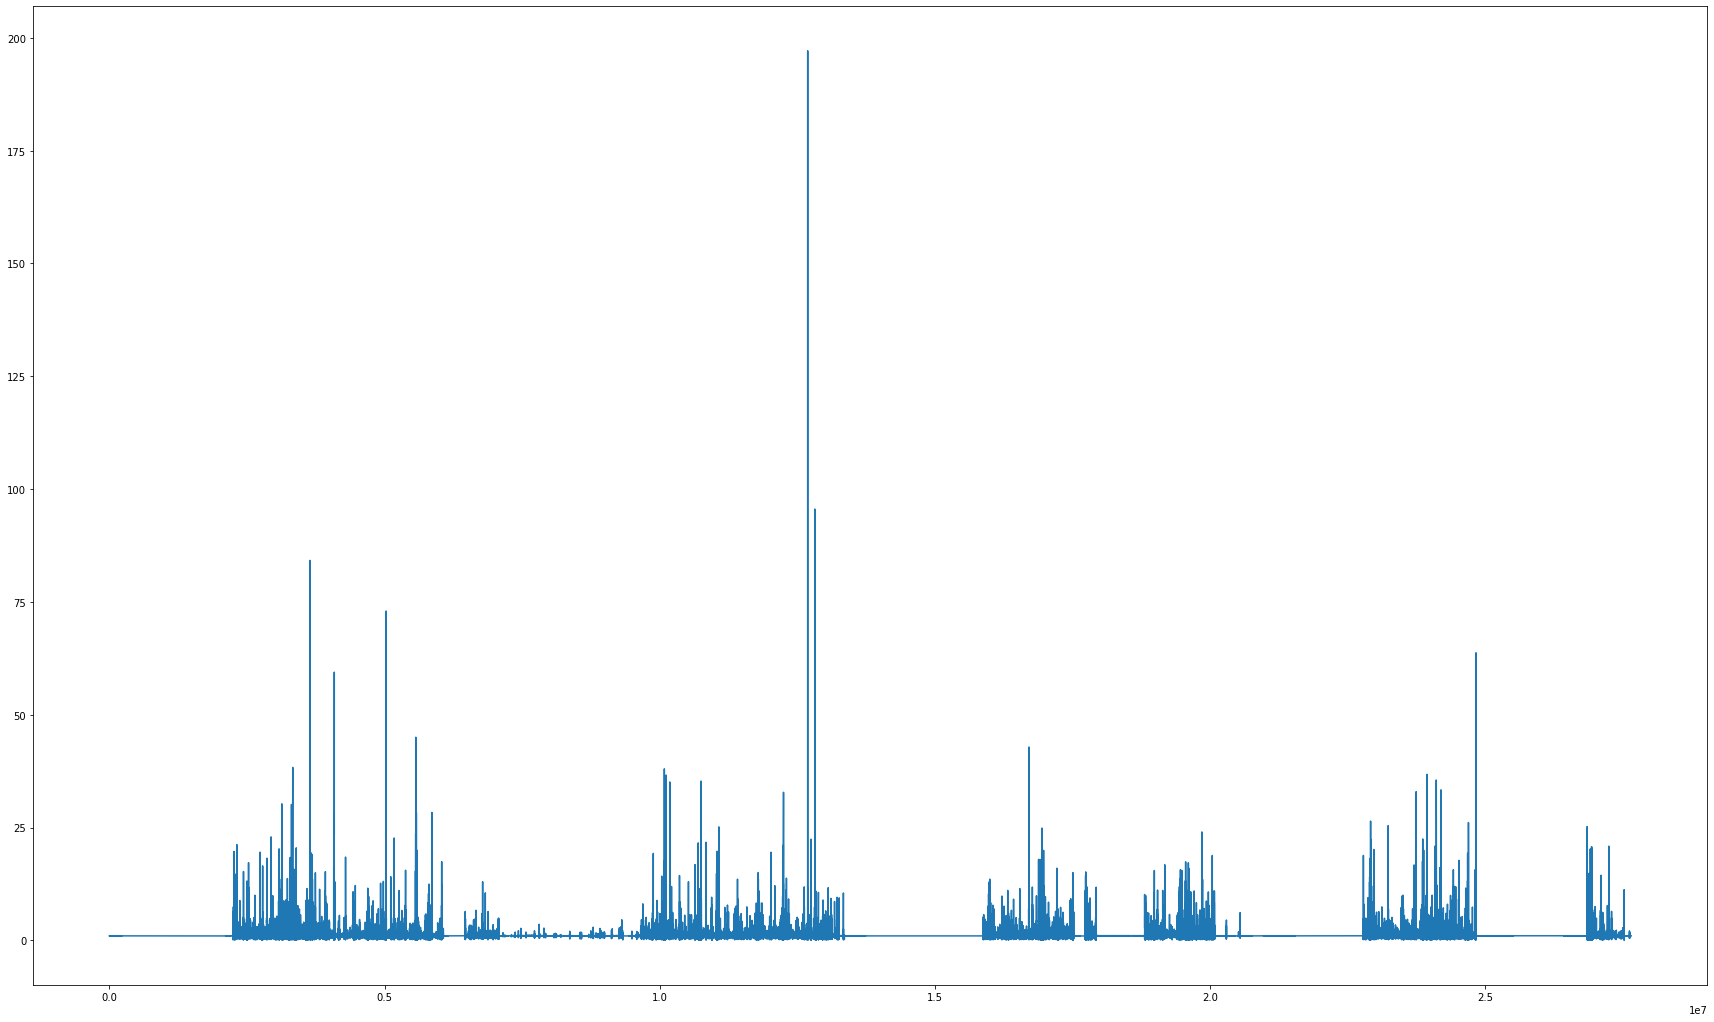

In [55]:
plt.figure(figsize=(30,18))
plt.plot(BAUIdf)
plt.show()

In [56]:
BAUIdf.describe()

,0
count,2.764800e+07
mean,1.008902e+00
std,1.607620e-01
min,1.437089e-02
25%,9.886501e-01
50%,1.001012e+00
75%,1.020680e+00
max,1.971222e+02


In [57]:
mean_BUAI_hourly = []
mean_BUAI_daily = []
# Iterazione attraverso i dati
for i in range(0, 192):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(BAUI[288000*i+1 : 288000*i+2])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_BUAI_hourly.append(media_intervallo)

for i in range(0, 4):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(BAUI[6912000*i+1 : 6912000*i+2])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_BUAI_daily.append(media_intervallo)

In [59]:
df_BUAImh=pd.DataFrame(mean_BUAI_hourly)
df_BUAImd=pd.DataFrame(mean_BUAI_daily)

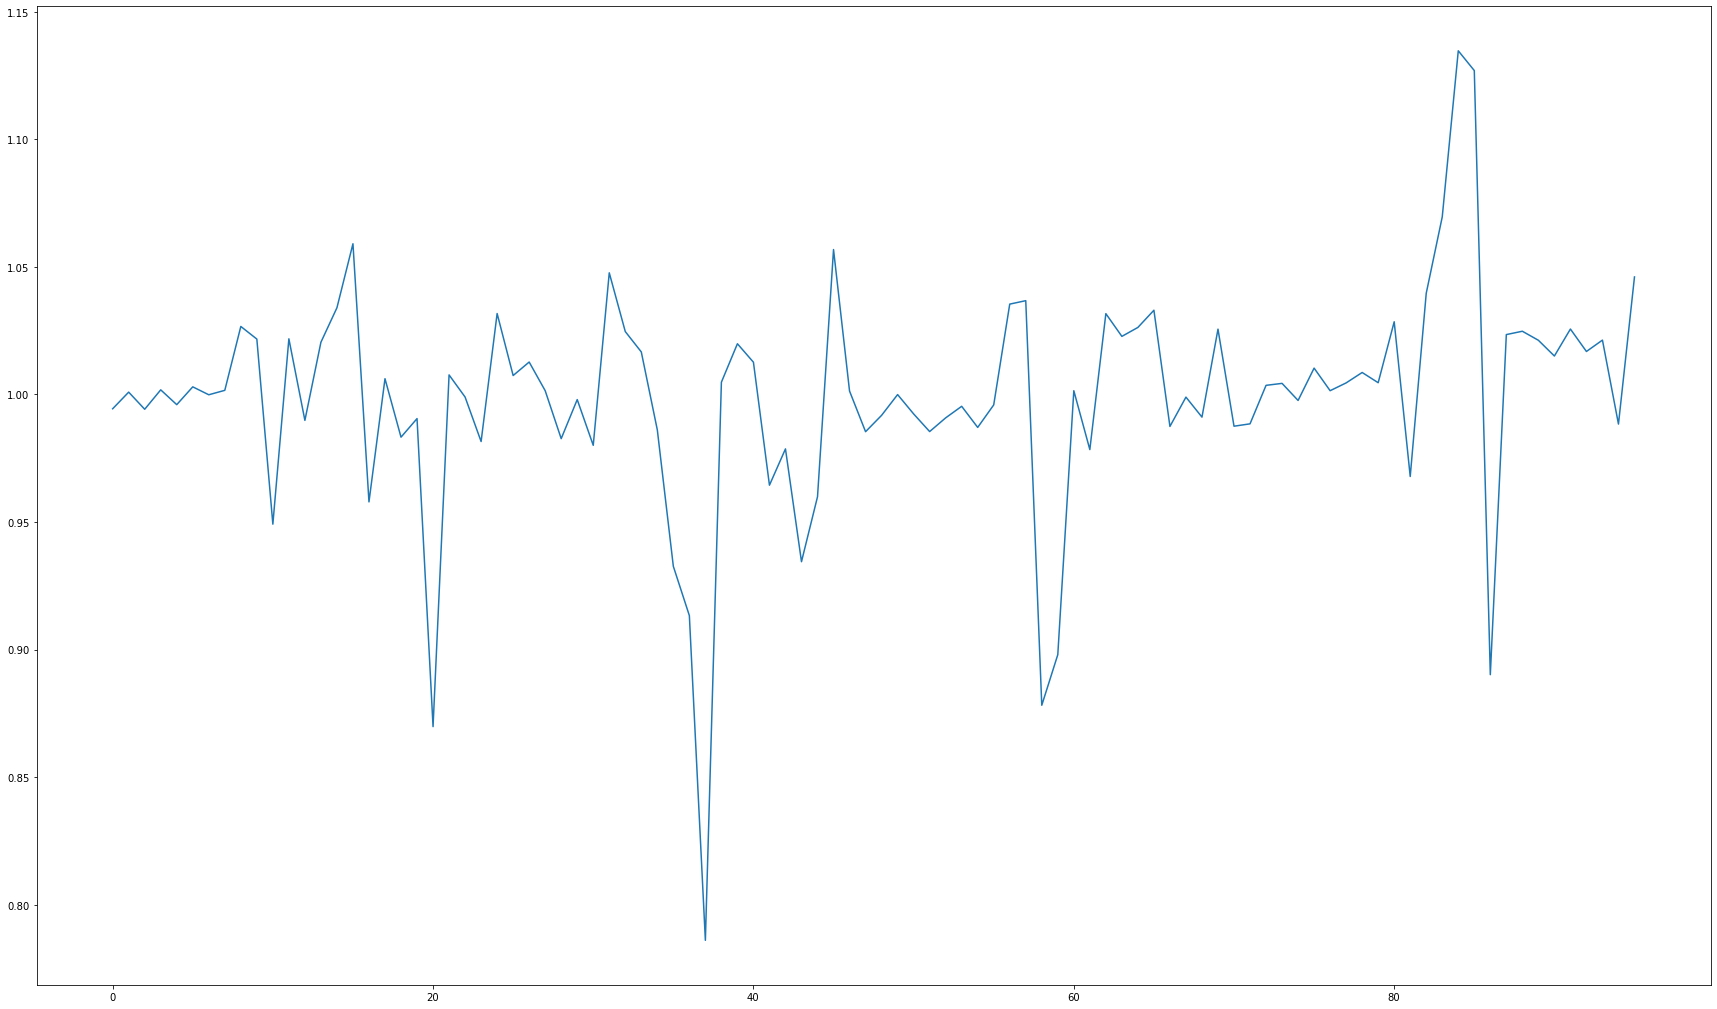

In [60]:
plt.figure(figsize=(30,18))
plt.plot(df_BUAImh)
plt.show()

In [61]:
df_BUAImh.describe()

,0
count,96.000000
mean,0.998798
std,0.045586
min,0.786036
25%,0.987530
50%,1.001469
75%,1.021729
max,1.134698


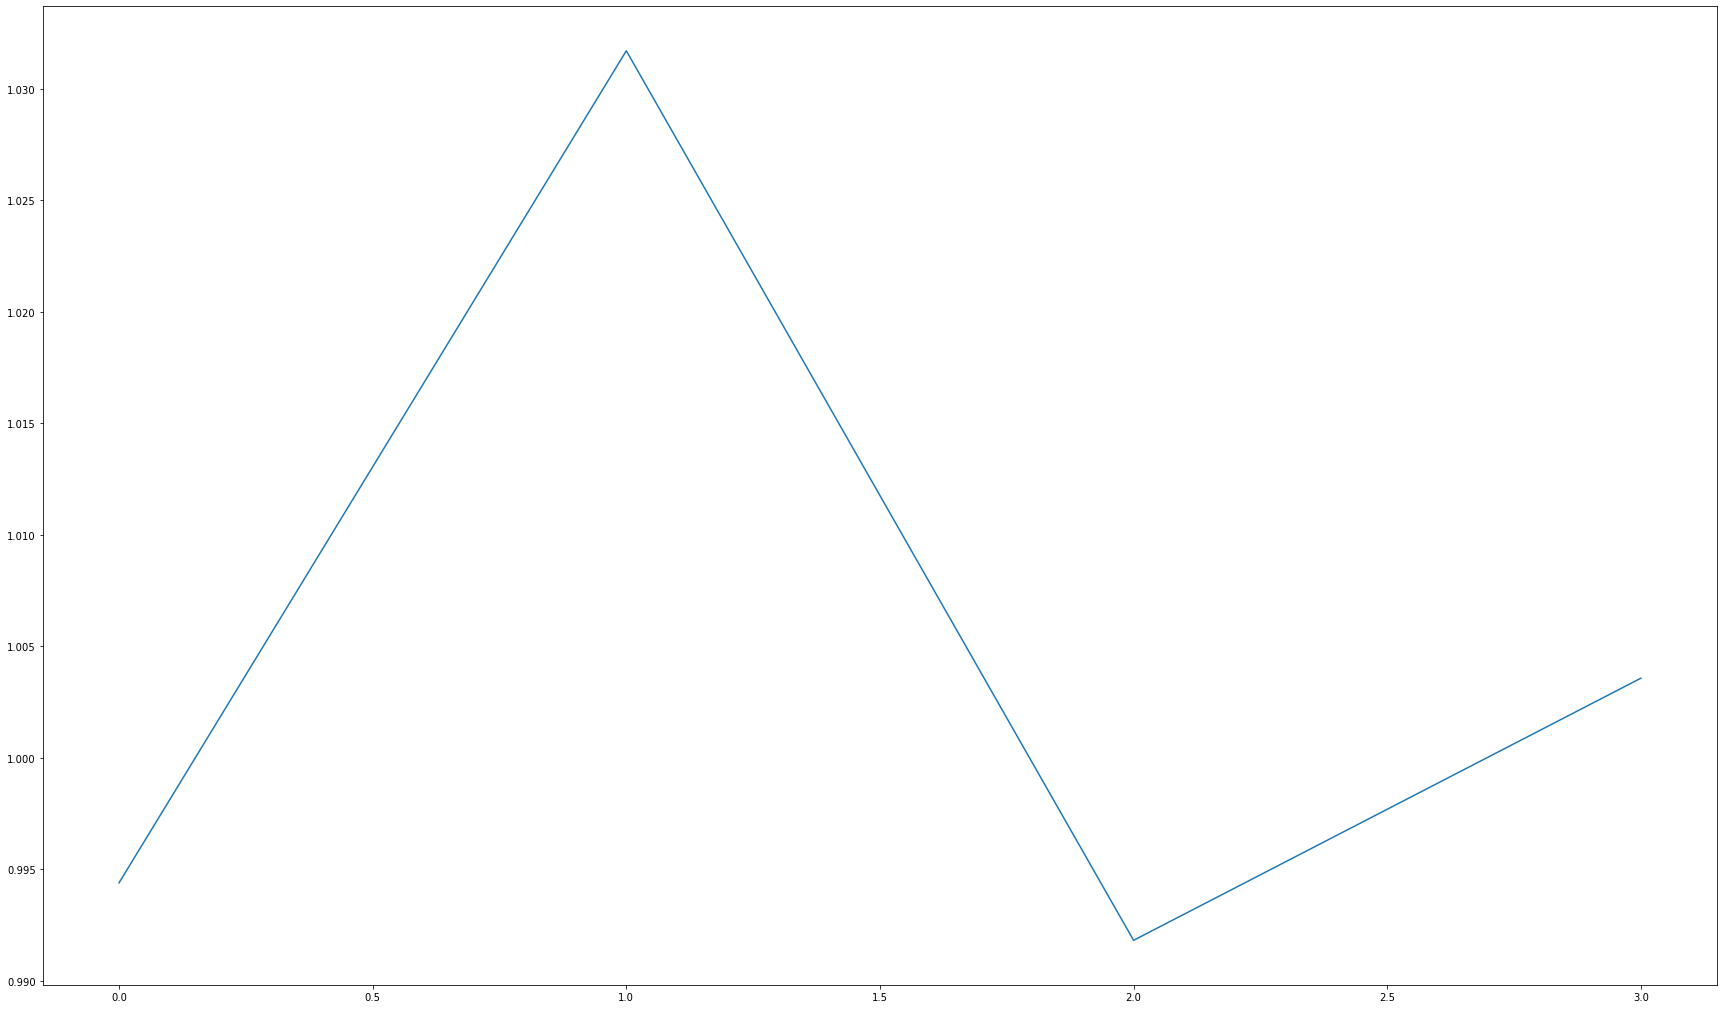

In [62]:
plt.figure(figsize=(30,18))
plt.plot(df_BUAImd)
plt.show()

In [63]:
df_BUAImd.describe()

,0
count,4.000000
mean,1.005370
std,0.018273
min,0.991810
25%,0.993744
50%,0.998978
75%,1.010604
max,1.031714
